In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# profile of school account
df_profile = pd.read_csv("KYRC24_ACCT_Profile.csv")

In [ ]:
# remove unnecessary columns and put focus on high schools only
df_profile = df_profile[(df_profile['Level'] == 'High School') & (df_profile['School Name']!= 'All Schools')]
df_profile = df_profile.drop(['School Year', 'County Number', 'District Number', 'School Number', 'School Code', 'State School Id', 'NCES Id', 'Co-Op', 'Co-Op Code','Federal Classification', 'Reason for Federal Classification', 'Feeder School'], axis=1)

In [ ]:
# remove repetitive data
def remove_repeats(df):
    dropped = []
    for col in df_profile.columns:
        if 'CHANGE DIFFERENCE' in col:
            dropped.append(col)
    return df_profile.drop(dropped, axis = 1)
    
df_profile = remove_repeats(df_profile)

In [ ]:
# extract dataframe with basic info about each school
df_basic = df_profile.filter(items=['County Name', 'District Name', 'School Name'])

In [ ]:
# function for focusing data using single keyword
def focus_df (keyword):
    upper = keyword.upper()
    df_filtered = df_profile.filter(like=upper)
    return df_filtered

In [ ]:
# create an empty list for user input to access info needed for plots
user_ints = []

In [ ]:
# function for specifying a metric to consider, specifically referencing groupings in the data
def metric_spec (question, opt_list):
    opt_str = 'Enter '
    for option in opt_list:
        if opt_list.index(option) < (len(opt_list)-2):
            opt_str = opt_str + f'{int(opt_list.index(option)+1)} for {option}, '
        elif opt_list.index(option) < int(len(opt_list)-1) and len(opt_list) == 2:
            opt_str = opt_str + f'{int(opt_list.index(option)+1)} for {option} '
        elif opt_list.index(option) < int(len(opt_list)-1) and len(opt_list) > 2:
            opt_str = opt_str + f'{int(opt_list.index(option)+1)} for {option}, '
        else:
            opt_str = opt_str + f'or {int(opt_list.index(option)+1)} for {option}.'
    metric = int(input(f'{question} {opt_str}'))
    user_ints.append(metric)
    # limitation of using focus_df if you have same starting word for grouping, 
    # can't differentiate based on current code
    return focus_df(opt_list[metric-1].split()[0].strip(','))

In [ ]:
# take user input for content focus
content = 'Which content area would you like to consider?'
content_list = ['Reading & Math', 'Science, Social Studies, & Writing']
df_met1 = metric_spec(content, content_list)

In [ ]:
# take user focus for non-content focus
non_con = 'Which non-content specific metric would you like to consider?' 
non_con_list = ['Graduation', 'English Learners Progress', 'Quality of School Climate and Safety', 'Postsecondary']
df_met2 = metric_spec(non_con, non_con_list)
# print(user_ints)

In [ ]:
# take user focus and join specific dataframes together for easier manipulation/visualization
df_joined = pd.concat([df_basic, df_met1, df_met2], axis = 1)
df_joined.head(50)
df_joined.to_csv('df_joined.csv', index=False)

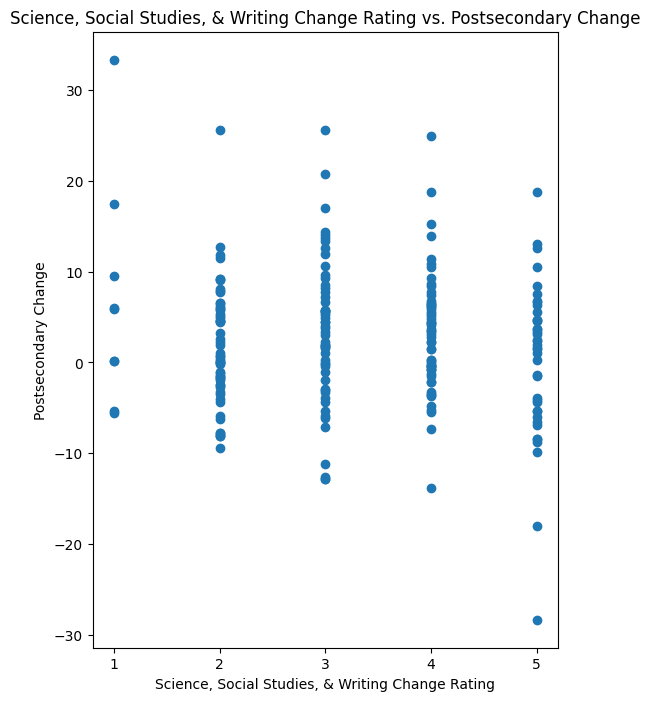

In [ ]:
plt.figure(figsize=(6, 8))

# get correct data for x-axis based on user input
if user_ints[0]==1: 
    x = df_joined['READING_MATH CHANGE RATING']
elif user_ints[0]==2:
    x = df_joined['SCIENCE_SOCIAL STUDIES_COMBINED WRITING CHANGE RATING']

# get correct data for y-axis based on user input
if user_ints[1]==1:
    y = df_joined['GRADUATION CHANGE']
elif user_ints[1]==2:
    y = df_joined['ENGLISH LEARNERS PROGRESS CHANGE']
elif user_ints[1]==3:
    y = df_joined['QUALITY OF SCHOOL CLIMATE AND SAFETY CHANGE']
elif user_ints[1]==4:
    y = df_joined['POSTSECONDARY CHANGE']

# create scatter plot
plt.scatter(x, y)

# limit x-axis values to 1 through 5
plt.xticks([1, 2, 3, 4, 5])

# add labels and title
plt.xlabel(content_list[user_ints[0]-1]+' Change Rating')
plt.ylabel(non_con_list[user_ints[1]-1]+' Change')
plt.title(content_list[user_ints[0]-1]+' Change Rating vs. '+non_con_list[user_ints[1]-1]+' Change')

# show plot
plt.show() 

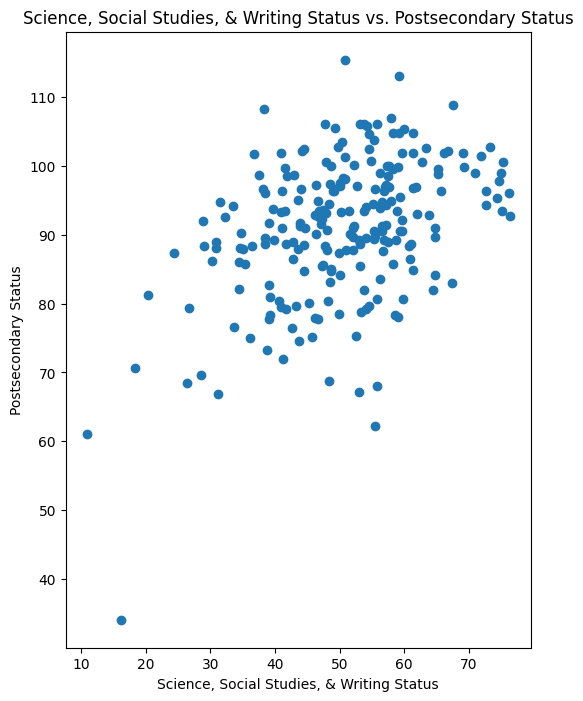

In [ ]:
plt.figure(figsize=(6, 8))

# get correct data for x-axis based on user input
if user_ints[0]==1: 
    x = df_joined['READING_MATH STATUS']
elif user_ints[0]==2:
    x = df_joined['SCIENCE_SOCIAL STUDIES_COMBINED WRITING STATUS']

# get correct data for y-axis based on user input
if user_ints[1]==1:
    y = df_joined['GRADUATION STATUS']
elif user_ints[1]==2:
    y = df_joined['ENGLISH LEARNERS PROGRESS STATUS']
elif user_ints[1]==3:
    y = df_joined['QUALITY OF SCHOOL CLIMATE AND SAFETY STATUS']
elif user_ints[1]==4:
    y = df_joined['POSTSECONDARY STATUS']

# create scatter plot
plt.scatter(x, y)

# add labels and title
plt.xlabel(content_list[user_ints[0]-1]+' Status')
plt.ylabel(non_con_list[user_ints[1]-1]+' Status')
plt.title(content_list[user_ints[0]-1]+' Status vs. '+non_con_list[user_ints[1]-1]+' Status')

# show plot
plt.show() 